In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv', sep=',', encoding='latin-1', nrows=1000, skiprows=[2,5])

sep means separator. If you’re working with French data, csv separator in Excel is “,” so you need to explicit it. Encoding is set to “latin-1” to read French characters. nrows=1000 means reading the first 1000 rows. skiprows=[2,5] means you will remove the 2nd and 5th row when reading the file

In [3]:
import sys 
!{sys.executable} -m pip install memory_profiler

In [5]:
people = {1: {'Name': 'John', 'Age': '27', 'Sex': 'Male'},
          2: {'Name': 'Marie', 'Age': '22', 'Sex': 'Female'}}

people[1]['Name']

for a, b in people.items():
    print("\nPerson ID:", a)
    #print(b)
   
    for c in b:
        print(c + ':', b[c])
        #print(c)


Person ID: 1
Name: John
Age: 27
Sex: Male

Person ID: 2
Name: Marie
Age: 22
Sex: Female


In [ ]:
people[1]["Age"]

In [5]:
data.head()

,x1,x2,y
0,31.5,88.7,20.1
1,35.0,102.5,16.1
2,31.6,101.7,14.9
3,26.2,79.1,8.8
4,14.1,45.1,9.7


In [22]:
data.to_csv('my_new_dataset.csv', index=None)

Index=None will simply write the data as it is. If you don’t write index=None, you’ll get an additional first column of 1,2,3, … until the last row.

In [23]:
data.loc[8]

x1    17.7
x2    66.4
y     10.3
Name: 8, dtype: float64

Print the 8th row

In [27]:
data.loc[8, 'x1']

17.7

In [28]:
data.loc[range(4,6)]

,x1,x2,y
4,14.1,45.1,9.7
5,24.7,77.8,10.3


Subset from row 4 to 6 (excluded)

In [30]:
data[(data['x1']==14.1) & (data['x2']==45.1) &~(data['y']==50)]

,x1,x2,y
4,14.1,45.1,9.7


Logical Ifadeler parantezde olmak zorunda

In [32]:
data[data['x1'].isin([14.1, 16.2, 17.3])]

,x1,x2,y
4,14.1,45.1,9.7
38,17.3,67.8,14.5


Instead of writing multiple ORs for the same column, use the .isin() function

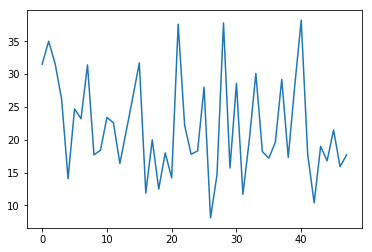

In [36]:
data['x1'].plot();

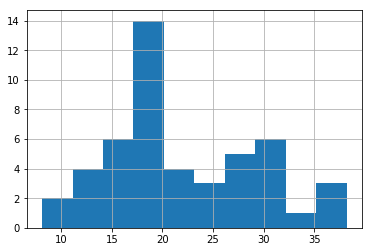

In [37]:
data['x1'].hist()

## UPDATING DATA

In [38]:
data.loc[8, 'x1'] =50

In [39]:
data[data['x1'].isin([14.1, 16.2, 17.3])]

,x1,x2,y
4,14.1,45.1,9.7
38,17.3,67.8,14.5


data.loc[data['x1']==17.3, 'x2'] = 100

In [ ]:
Change values of multiple rows in one line

In [49]:
data.loc[38]

x1     17.3
x2    100.0
y      14.5
Name: 38, dtype: float64

Returns a series

In [50]:
data.loc[[38]]

,x1,x2,y
38,17.3,100.0,14.5


Returns a dataframe

In [54]:
data['2*x1'] = data['x1'].map(lambda x : 2*x)

map is used for each element

In [55]:
data.head()

,x1,x2,y,2*x1
0,31.5,88.7,20.1,63.0
1,35.0,102.5,16.1,70.0
2,31.6,101.7,14.9,63.2
3,26.2,79.1,8.8,52.4
4,14.1,45.1,9.7,28.2


In [56]:
data.apply(sum)

x1      1082.4
x2      3460.9
y        623.2
2*x1    2164.8
dtype: float64

apply is used for column

# tqdm library




When working with large datasets, pandas can take some time running .map(), .apply(), .applymap() operations. tqdm is a very useful package that helps predict when theses operations will finish executing

In [6]:
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [7]:
data['new_string'] = ['elma' if index % 2==0 else 'ayva' for index in range(len(data))]

In [8]:
data.head()

,x1,x2,y,new_string
0,31.5,88.7,20.1,elma
1,35.0,102.5,16.1,ayva
2,31.6,101.7,14.9,elma
3,26.2,79.1,8.8,ayva
4,14.1,45.1,9.7,elma


In [10]:
data['new_string'].progress_map(lambda x: x.count('e'))

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    1
29    0
30    1
31    0
32    1
33    0
34    1
35    0
36    1
37    0
38    1
39    0
40    1
41    0
42    1
43    0
44    1
45    0
46    1
47    0
Name: new_string, dtype: int64

In [11]:
data.corr()
data.corr().applymap(lambda x: int(x*100)/100)

,x1,x2,y
x1,1.00,0.95,0.70
x2,0.95,1.00,0.65
y,0.70,0.65,1.00


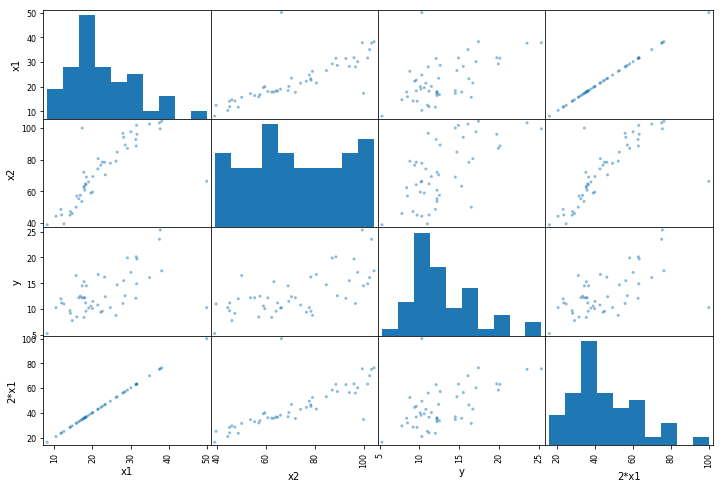

In [69]:
pd.plotting.scatter_matrix(data, figsize=(12,8));

# The SQL Join

In [71]:
# data.merge(other_data, on=['column_1', 'column_2', 'column_3'])

Joining on 3 columns takes just one line

In [12]:
data.head()

,x1,x2,y,new_string
0,31.5,88.7,20.1,elma
1,35.0,102.5,16.1,ayva
2,31.6,101.7,14.9,elma
3,26.2,79.1,8.8,ayva
4,14.1,45.1,9.7,elma


In [13]:
data.groupby('x1')['x2'].apply(sum).reset_index().head()

,x1,x2
0,8.1,39.0
1,10.4,44.4
2,11.7,48.7
3,11.9,45.2
4,12.5,39.6


Group by a column, the select another column on which to operate a function. The .reset_index() reshapes your data as a DataFrame (table). Burada x1 degerleri unique oldugu icin ayni satirdaki x2 degerlerini donduruyor eger ayni degere sahip 1 den fazla x1 olsa onlara karsilik gelen x2 leri toplayacakti. .reset_index() demezsen data_frame olarak dondurmez.

In [14]:
data.groupby('x1')['x2'].apply(sum).head()

x1
8.1     39.0
10.4    44.4
11.7    48.7
11.9    45.2
12.5    39.6
Name: x2, dtype: float64

In [15]:
print("{:.2f} and {:.1f}".format(28.2904378, 64.347895))

28.29 and 64.3
